### 통계청 : 지역별 사교육 참여율 데이터 활용

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

In [3]:
df = pd.read_excel('data/data_private.xlsx')
df.head()

,과목 및 유형,2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2020,2020.1,...,2020.4,2020.5,2020.6,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6
0,과목 및 유형,평 균 (%),대도시 (%),서 울 (%),광역시 (%),대도시이외 (%),중소도시 (%),읍면지역 (%),평 균 (%),대도시 (%),...,대도시이외 (%),중소도시 (%),읍면지역 (%),평 균 (%),대도시 (%),서 울 (%),광역시 (%),대도시이외 (%),중소도시 (%),읍면지역 (%)
1,대상분포(%),100,39.6,15.9,23.7,60.4,44.9,15.5,100,39.4,...,60.6,44.2,16.4,100,39,15.5,23.5,61,44.5,16.5
2,사교육 참여,74.8,77,80,75,73.3,76.3,64.5,67.1,70.1,...,65.2,67.8,57.9,75.5,78.2,81.5,76,73.8,76.3,67.2
3,과목: 일반교과 사교육,56.7,59.3,63,56.9,55,57.7,47.5,52.7,56.2,...,50.4,53.1,43,61.1,64.4,68.7,61.6,58.9,61.5,52
4,국 어,21.3,22,23.6,20.9,20.9,21.3,19.6,20,21.1,...,19.3,19.7,18.3,24.6,25.5,27.9,23.9,24.1,24.7,22.6


In [4]:
df.columns

Index(['과목 및 유형', '2019', '2019.1', '2019.2', '2019.3', '2019.4', '2019.5',
       '2019.6', '2020', '2020.1', '2020.2', '2020.3', '2020.4', '2020.5',
       '2020.6', '2021', '2021.1', '2021.2', '2021.3', '2021.4', '2021.5',
       '2021.6'],
      dtype='object')

In [5]:
df.columns[0]

'과목 및 유형'

In [6]:
df.set_index(df.columns[0], inplace=True)
df.head()

,2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2020,2020.1,2020.2,...,2020.4,2020.5,2020.6,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6
과목 및 유형,,,,,,,,,,,,,,,,,,,,,
과목 및 유형,평 균 (%),대도시 (%),서 울 (%),광역시 (%),대도시이외 (%),중소도시 (%),읍면지역 (%),평 균 (%),대도시 (%),서 울 (%),...,대도시이외 (%),중소도시 (%),읍면지역 (%),평 균 (%),대도시 (%),서 울 (%),광역시 (%),대도시이외 (%),중소도시 (%),읍면지역 (%)
대상분포(%),100,39.6,15.9,23.7,60.4,44.9,15.5,100,39.4,15.7,...,60.6,44.2,16.4,100,39,15.5,23.5,61,44.5,16.5
사교육 참여,74.8,77,80,75,73.3,76.3,64.5,67.1,70.1,75,...,65.2,67.8,57.9,75.5,78.2,81.5,76,73.8,76.3,67.2
과목: 일반교과 사교육,56.7,59.3,63,56.9,55,57.7,47.5,52.7,56.2,60.9,...,50.4,53.1,43,61.1,64.4,68.7,61.6,58.9,61.5,52
국 어,21.3,22,23.6,20.9,20.9,21.3,19.6,20,21.1,23.7,...,19.3,19.7,18.3,24.6,25.5,27.9,23.9,24.1,24.7,22.6


In [7]:
df = df[['2019', '2020', '2021']]
df

,2019,2020,2021
과목 및 유형,,,
과목 및 유형,평 균 (%),평 균 (%),평 균 (%)
대상분포(%),100,100,100
사교육 참여,74.8,67.1,75.5
과목: 일반교과 사교육,56.7,52.7,61.1
국 어,21.3,20,24.6
영 어,44.1,41.4,49.6
수 학,47.2,44.4,50.9
"사회, 과학",12,10.8,14.1
논 술,9.2,8,10.1


In [8]:
df_edu = df.drop(df.index[0])
df_edu

,2019,2020,2021
과목 및 유형,,,
대상분포(%),100,100,100
사교육 참여,74.8,67.1,75.5
과목: 일반교과 사교육,56.7,52.7,61.1
국 어,21.3,20,24.6
영 어,44.1,41.4,49.6
수 학,47.2,44.4,50.9
"사회, 과학",12,10.8,14.1
논 술,9.2,8,10.1
"제2외국어, 한문, 컴퓨터 등",7.1,4.5,5.8


In [9]:
df_edu['차이'] = df_edu['2020'] - df_edu['2019']
df_edu

,2019,2020,2021,차이
과목 및 유형,,,,
대상분포(%),100,100,100,0
사교육 참여,74.8,67.1,75.5,-7.7
과목: 일반교과 사교육,56.7,52.7,61.1,-4.0
국 어,21.3,20,24.6,-1.3
영 어,44.1,41.4,49.6,-2.7
수 학,47.2,44.4,50.9,-2.8
"사회, 과학",12,10.8,14.1,-1.2
논 술,9.2,8,10.1,-1.2
"제2외국어, 한문, 컴퓨터 등",7.1,4.5,5.8,-2.6


In [10]:
df_edu = df_edu.drop(df_edu.index[1:18])
df_edu

,2019,2020,2021,차이
과목 및 유형,,,,
대상분포(%),100,100,100,0
유형: 일반교과 사교육,56.7,52.7,61.1,-4.0
개인과외,8.9,8.7,10.1,-0.2
그룹과외,9.3,8.3,9,-1.0
학원수강,41.1,37.9,44.5,-3.2
방문학습지,12.9,10.5,11.7,-2.4
유료인터넷 및 통신강좌 등,7.5,6.4,10.3,-1.1
"유형: 예체능,취미,교양 사교육",44,32,41,-12
개인과외,5.6,4.6,4.9,-1.0


In [11]:
# 일반교과 사교육
df_edu_gp1 = df_edu[2:7]
df_edu_gp1

,2019,2020,2021,차이
과목 및 유형,,,,
개인과외,8.9,8.7,10.1,-0.2
그룹과외,9.3,8.3,9,-1.0
학원수강,41.1,37.9,44.5,-3.2
방문학습지,12.9,10.5,11.7,-2.4
유료인터넷 및 통신강좌 등,7.5,6.4,10.3,-1.1


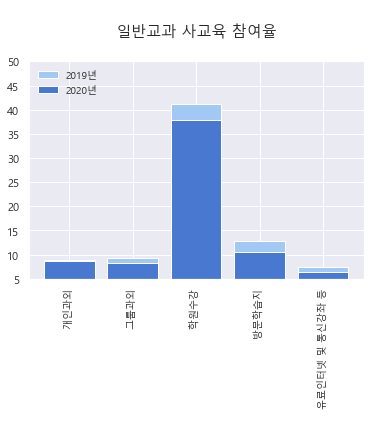

In [12]:
fig = plt.rcParams["figure.figsize"] = [6,4]

sns.set_color_codes("pastel")
plt.bar(df_edu_gp1.index, df_edu_gp1['2019'], color='b', width=0.8, label='2019년')

sns.set_color_codes("muted")
plt.bar(df_edu_gp1.index, df_edu_gp1['2020'], color='b', width=0.8, label='2020년')

plt.legend(loc=2, fontsize=10, frameon=False)
plt.title('\n 일반교과 사교육 참여율 \n', fontsize=15)
plt.ylim(5, 50)
plt.xticks(rotation = 90, fontsize = 10)

plt.show()

In [13]:
# 예체능 사교육
df_edu_gp2 = df_edu[8:12]
df_edu_gp2

,2019,2020,2021,차이
과목 및 유형,,,,
개인과외,5.6,4.6,4.9,-1.0
그룹과외,5,3,3.4,-2
학원수강,34.8,25,34,-9.8
방문수업 및 기타,5.8,2.4,3.2,-3.4


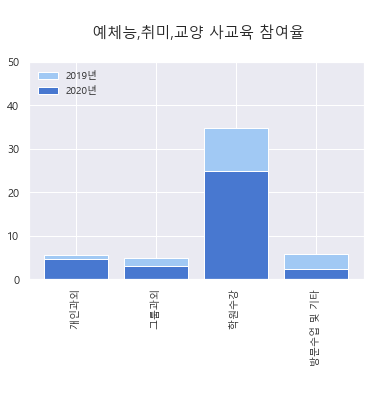

In [53]:
fig = plt.rcParams["figure.figsize"] = [6,4]

sns.set_color_codes("pastel")
plt.bar(df_edu_gp2.index, df_edu_gp2['2019'], color='b', width=0.8, label='2019년')

sns.set_color_codes("muted")
plt.bar(df_edu_gp2.index, df_edu_gp2['2020'], color='b', width=0.8, label='2020년')

plt.legend(loc=2, fontsize=10, frameon=False)
plt.title('\n 예체능,취미,교양 사교육 참여율\n', fontsize=15)
plt.ylim(0, 50)
plt.xticks(rotation = 90, fontsize = 10)

plt.show()

In [102]:
ax.set_xticklabels(['start', 'middel', 'end'], fontsize=12)
ax.set_yticklabels(['low', 'zero', 'high'], fontsize=12)

[7, 4]

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

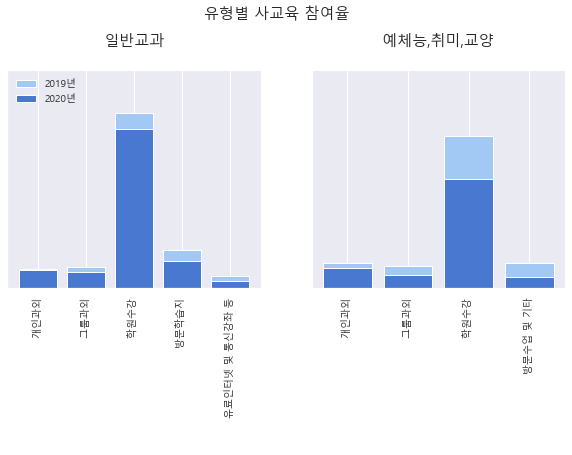

In [14]:
plt.figure(figsize=(10,4))

# figure 전체 제목
# plt.suptitle('년도별 사교육 참여율', fontsize = 20)
plt.suptitle('유형별 사교육 참여율', 
          position=(0.5, 1.1), 
          fontsize=15)## title 위치 변경 

plt.subplot(121) 
sns.set_color_codes("pastel")
plt.bar(df_edu_gp1.index, df_edu_gp1['2019'], color='b', width=0.8, label='2019년')

sns.set_color_codes("muted")
plt.bar(df_edu_gp1.index, df_edu_gp1['2020'], color='b', width=0.8, label='2020년')

plt.legend(loc=2, fontsize=10, frameon=False)
plt.title('\n 일반교과 \n', fontsize=15)
plt.gca().axes.yaxis.set_visible(False) #y축만 없애기
plt.ylim(5, 50)
plt.xticks(rotation = 90, fontsize = 10)

plt.subplot(122) 
sns.set_color_codes("pastel")
plt.bar(df_edu_gp2.index, df_edu_gp2['2019'], color='b', width=0.8, label='2019년')

sns.set_color_codes("muted")
plt.bar(df_edu_gp2.index, df_edu_gp2['2020'], color='b', width=0.8, label='2020년')

# plt.legend(loc=2, fontsize=10, frameon=False)
plt.title('\n 예체능,취미,교양 \n', fontsize=15)
plt.gca().axes.yaxis.set_visible(False) #y축만 없애기
plt.ylim(0, 50)
plt.xticks(rotation = 90, fontsize = 10)